In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm

In [3]:
file_path = "./dataset_new/"
retail_data = pd.read_csv(f"{file_path}Retail data.csv")
industry_data = pd.read_csv(f"{file_path}Industry data.csv")

---

## 1. Store별 가지고 있는 기간

In [4]:
retail_data_store_month = retail_data[["Month", "Store"]]
retail_data_store_month.drop_duplicates(inplace=True)
retail_data_store_month.reset_index(inplace=True, drop=True)
YM_r = []  # YYMM
for i in tqdm(range(len(retail_data_store_month))):
    YM_r.append(int(retail_data_store_month.loc[i]["Month"][2:4] + retail_data_store_month.loc[i]["Month"][5:7]))

/tmp/ipykernel_21601/175981401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data_store_month.drop_duplicates(inplace=True)
100%|██████████| 34512/34512 [00:06<00:00, 5447.48it/s]


In [5]:
industry_data_store_month = industry_data[["Month", "Store"]]
industry_data_store_month.drop_duplicates(inplace=True)
industry_data_store_month.reset_index(inplace=True, drop=True)
YM_i = []  # YYMM
for i in tqdm(range(len(industry_data_store_month))):
    YM_i.append(int(industry_data_store_month.loc[i]["Month"][2:4] + industry_data_store_month.loc[i]["Month"][5:7]))

/tmp/ipykernel_21601/2317767264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_data_store_month.drop_duplicates(inplace=True)
100%|██████████| 53311/53311 [00:09<00:00, 5446.10it/s]


In [6]:
retail_data_store_month["YM"] = YM_r
industry_data_store_month["YM"] = YM_i
industry_data_store_month

/tmp/ipykernel_21601/3812650028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data_store_month["YM"] = YM_r
/tmp/ipykernel_21601/3812650028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_data_store_month["YM"] = YM_i


,Month,Store,YM
0,2015-01-01 00:00:00,1,1501
1,2015-02-01 00:00:00,1,1502
2,2015-03-01 00:00:00,1,1503
3,2015-04-01 00:00:00,1,1504
4,2015-05-01 00:00:00,1,1505
...,...,...,...
53306,2021-11-01 00:00:00,642,2111
53307,2021-12-01 00:00:00,642,2112
53308,2022-01-01 00:00:00,642,2201
53309,2022-02-01 00:00:00,642,2202


In [24]:
r_ym_store_ct = pd.crosstab(retail_data_store_month["YM"], retail_data_store_month["Store"]).loc[::-1]  # 행 순서 역순
i_ym_store_ct = pd.crosstab(industry_data_store_month["YM"], industry_data_store_month["Store"]).loc[::-1]
r_ym_store_ct

Store,1,2,3,4,5,6,7,9,10,12,...,633,634,635,636,637,638,639,640,641,642
YM,,,,,,,,,,,,,,,,,,,,,
2203,0,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,1
2202,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,1
2201,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,0
2112,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0
2111,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,0,0,0,0,0,0,0,0,0,1,...,1,1,0,1,1,0,1,1,1,1
1504,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,1,0,1,1,1,1
1503,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,1,0


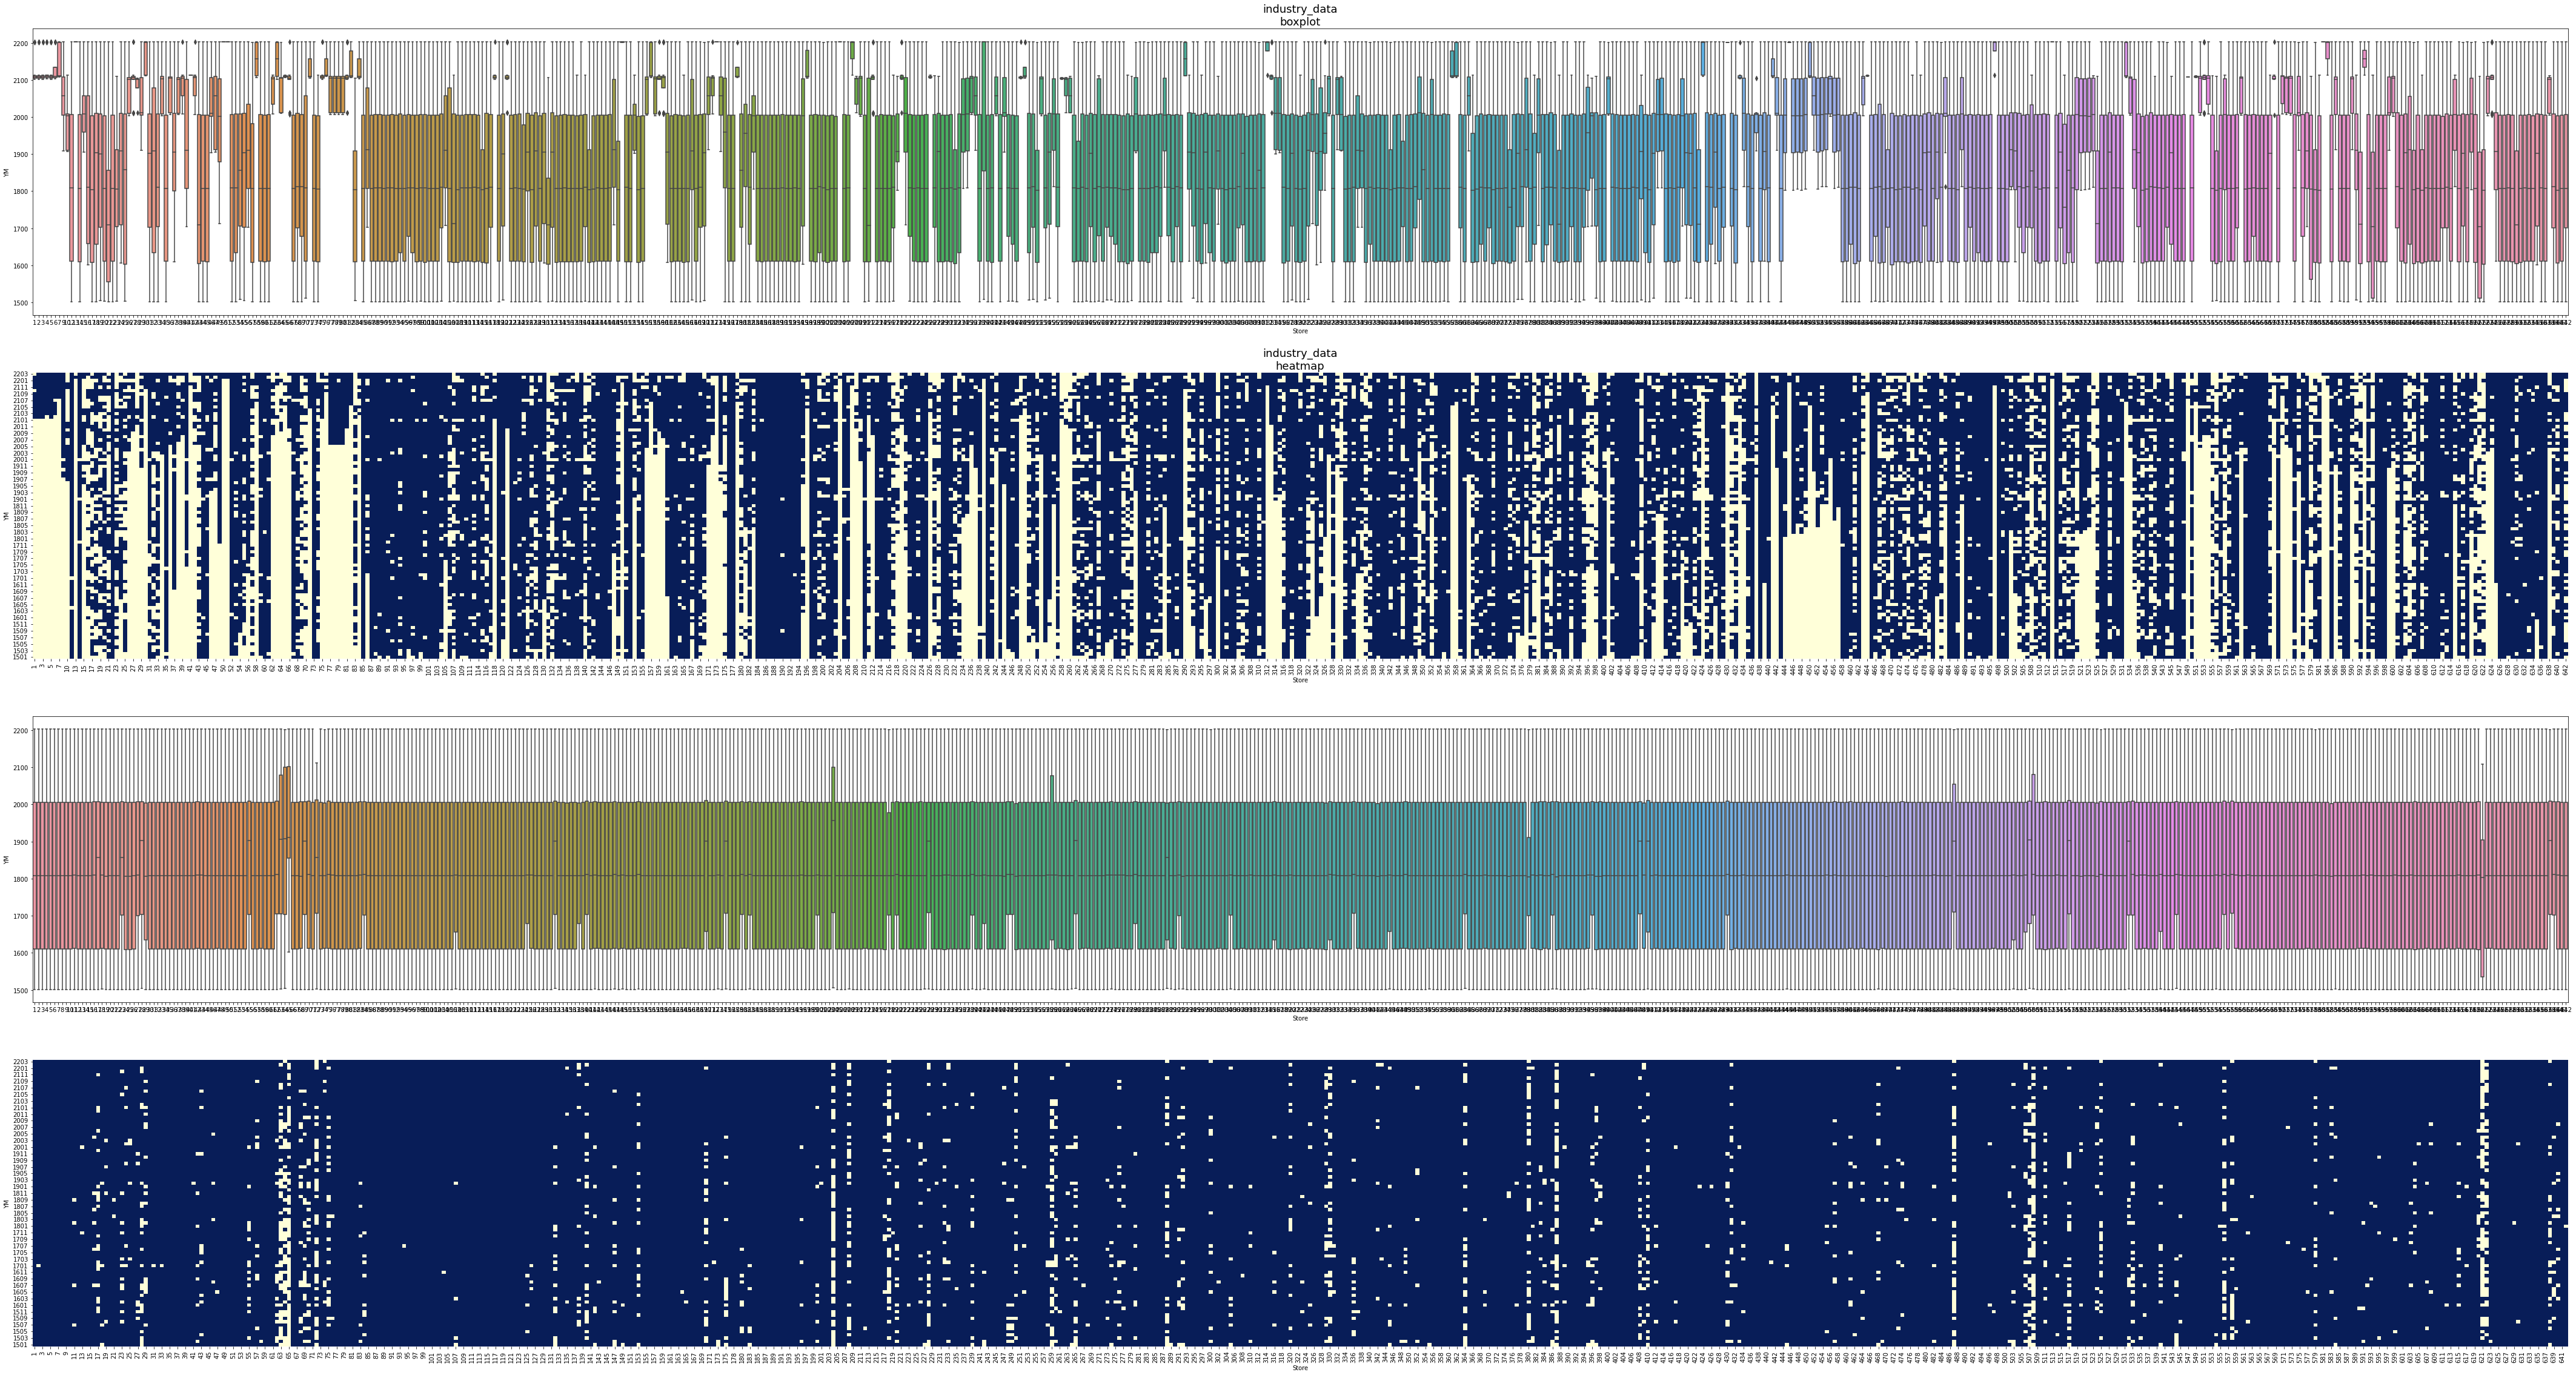

In [28]:
# # # 시간 오래걸려서 이미지 사라지지 않는 이상 재실행 X
# fig, axes = plt.subplots(4,1,figsize=(75,40))
# sns.boxplot(x='Store', y='YM', data=retail_data_store_month, ax = axes[0])
# sns.heatmap(r_ym_store_ct, ax=axes[1],cmap='YlGnBu',cbar=False)
# sns.boxplot(x='Store', y='YM', data=industry_data_store_month, ax = axes[2]);
# sns.heatmap(i_ym_store_ct, ax=axes[3],cmap='YlGnBu',cbar=False)


# axes[0].set_title("retail_data\nboxplot", fontsize=18)
# axes[1].set_title("retail_data\nheatmap", fontsize=18)
# axes[0].set_title('industry_data\nboxplot', fontsize=18)
# axes[1].set_title('industry_data\nheatmap', fontsize=18)
# plt.show()

**retail data**
- 전체적으로 15년도~22년도 정보를 가졌으나, 일부 Data는 후반기 정보만 가진 것이 존재한다

**industry data**
- 대부분이 15~22년도 정보를 가짐

#### analysis result
- 이전에 전반적 판매량 상승세를 보인 것은,  초반 부분의 데이터가 부족해서일 가능성이 높아보임
- 생각보다 연속적인 기간을 가지고 있지 않음 -> `가게 별 가지고 있는 데이터의 수를 고려해야하지 않을까?` 